In [1]:
from torch.utils.data import DataLoader
from train import Trainer
from models import Generator, Critic
import os
import data.data_preprocessing as data_prep
import torch
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

c:\Users\bolla\miniconda3\envs\torch_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#create the transformer to scale the series
class ScaleInput:

    def __call__(slef, sample):
        return sample * 100

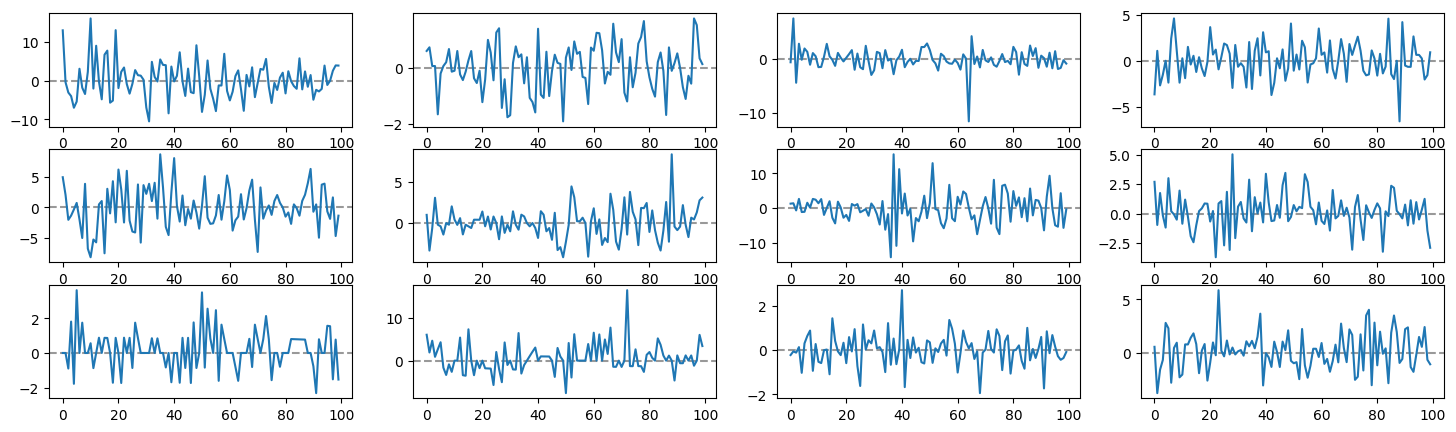

In [4]:
#create the dataloader
dataset = data_prep.WindowsDaset('data\dataset_100_winds', transform = ScaleInput())
#plotsome series
rows = 3
columns = 4
fig, axs = plt.subplots(rows, columns, figsize=(18,5))
for ax, i in zip(axs.ravel(),np.random.randint(0, len(dataset),size=rows * columns)):
    ax.axhline(0, color = 'black', alpha =0.4, ls = '--')
    ax.plot(dataset[i])

In [3]:
#clear the dataset
if False:
    from tqdm import tqdm
    file_list = os.listdir('data\dataset_100_winds')

    for ind, ser in tqdm(enumerate(dataset)):
        if len(ser) != 100:
            print(f'error at it {ind}')
            os.remove(os.path.join('data\dataset_100_winds',file_list[ind]))
            file_list.pop(ind)


10353it [02:34, 66.82it/s]


In [5]:
#global for the run
GP_WEIGHT = 10
CRITIC_IT = 5
PRINT_EVERY = 10
CHECKPOINT_FREQ = 10
BATCH_SIZE = 256
LOG_NAME = 'run_1_0'
EPOCHS = 40

In [6]:
#create the dataloader
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE)

In [46]:
import models
importlib.reload(models)
from models import Generator, Critic

In [7]:
# Instantiate Generator and Critic + initialize weights
g = Generator()
g_opt = torch.optim.RMSprop(g.parameters(), lr=0.05)

c = Critic()
c_opt = torch.optim.RMSprop(c.parameters(), lr=0.05)

log_name = LOG_NAME
# Instantiate Tensorboard writer
tb_logdir = os.path.join('tensorboard', log_name)
writer = SummaryWriter(log_dir=tb_logdir)

# Instantiate Trainer
trainer = Trainer(g, c, g_opt, c_opt,GP_WEIGHT,CRITIC_IT,PRINT_EVERY,CHECKPOINT_FREQ, writer = writer)
# Train model
print('Training is about to start...')


trainer.train(data_loader, epochs=EPOCHS, plot_training_samples=True, checkpoint=None)

Training is about to start...


 10%|█         | 4/40 [08:56<1:09:30, 115.85s/it]

In [71]:

def generate_sample(model, out_tensor : bool):
    pr = model(torch.rand((1,50)))
    plt.plot(pr.detach().numpy()[0]/100)
    plt.axhline(0)
    #plt.ylim(-1,1)

    if out_tensor == True:
        print(pr.detach().numpy()[0])

In [25]:
torch.rand((1,50))
#initialization
glorot
exevier

tensor([[0.5538, 0.9548, 0.5216, 0.5608, 0.6632, 0.1223, 0.8175, 0.4813, 0.7441,
         0.8572, 0.1812, 0.4888, 0.2300, 0.4089, 0.7427, 0.3334, 0.4602, 0.3593,
         0.4726, 0.6832, 0.8958, 0.5150, 0.8006, 0.0422, 0.1079, 0.2701, 0.9693,
         0.7117, 0.2359, 0.6181, 0.7847, 0.8253, 0.1505, 0.4356, 0.2205, 0.6575,
         0.1297, 0.3144, 0.3863, 0.2562, 0.7395, 0.6556, 0.7603, 0.8269, 0.8660,
         0.1035, 0.0706, 0.6691, 0.0155, 0.9844]])

In [ ]:
import torch

model = torch.load('"C:\Users\bolla\Desktop\CUHK_courses\IASP_elisa\run_without_spectral norm\models\epoch_40.pkl"')['g_state_dict']

In [83]:
import models_2
import importlib
importlib.reload(models_2)
from models_2 import Generator, Critic

In [29]:
model = Generator()

In [81]:
torch.save({
                    'g_state_dict': g.state_dict(),
                }, 'checkpoints/epoch_40.pkl')

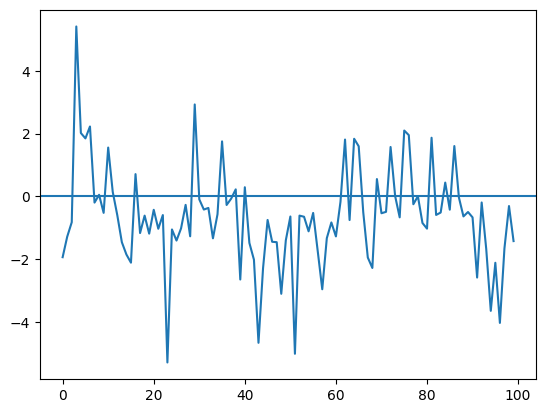

In [82]:
generate_sample(g, out_tensor = False)

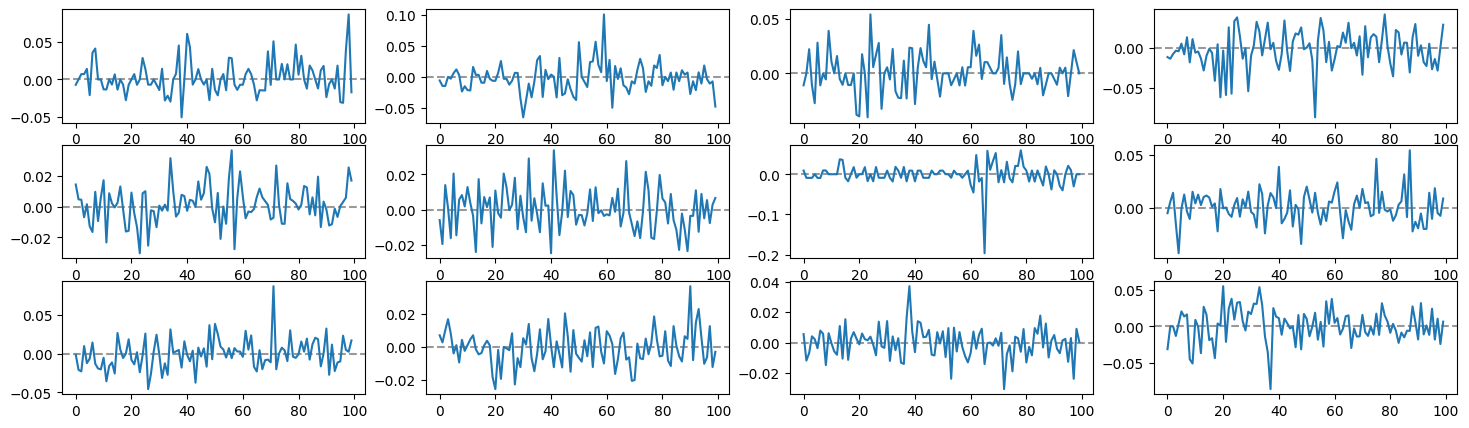

In [42]:
rows = 3
columns = 4
fig, axs = plt.subplots(rows, columns, figsize=(18,5))
for ax, i in zip(axs.ravel(),np.random.randint(0, len(dataset),size=rows * columns)):
    ax.axhline(0, color = 'black', alpha =0.4, ls = '--')
    ax.plot(dataset[i]/100)